# Aditya Birla Finance

In [1]:
# Load necessary libraries
import sys
import glob
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import gensim
import spacy
import numpy as np
import tqdm.notebook as tqdm
from pprint import pprint
import pickle
import plotly.express as px
import pyLDAvis

sys.path.append('/Users/pushkar/Documents/projects/fin_comp/comp/docs')

import utils.helper
from utils.helper import Processor
import importlib
importlib.reload(utils.helper)

<module 'utils.helper' from '/Users/pushkar/Documents/projects/fin_comp/comp/docs/utils/helper.py'>

In [2]:
# Load data
df = pd.read_csv('./../../data/nbfc/aditya_birla_finance/aditya_birla_finance.csv')

In [3]:
# Know the shape of the loaded data
df.shape

(1210, 27)

## Preprocessing

In [4]:
processor = Processor('./../../data/config.json')

In [5]:
# Preprocess the data
pre_df, post_df = processor.preprocess(df)

In [6]:
# Create dictionaries
pre_id2word = gensim.corpora.Dictionary(pre_df['bigram'].values.tolist())
post_id2word = gensim.corpora.Dictionary(post_df['bigram'].values.tolist())

In [7]:
# Create corpus
pre_corpus = [pre_id2word.doc2bow(text) for text in pre_df['bigram'].values.tolist()]
post_corpus = [post_id2word.doc2bow(text) for text in post_df['bigram'].values.tolist()]

## Base Model

### Training

In [8]:
pre_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [9]:
pprint(pre_lda_model.print_topics())
pre_doc_lda = pre_lda_model[pre_corpus]

[(0,
  '0.013*"capital" + 0.013*"bank" + 0.010*"kindly" + 0.009*"bn" + '
  '0.009*"india" + 0.009*"time" + 0.009*"payment" + 0.007*"people" + '
  '0.007*"cheated" + 0.007*"life"'),
 (1,
  '0.033*"india" + 0.017*"money" + 0.010*"bank" + 0.010*"services" + '
  '0.009*"bse" + 0.008*"results" + 0.008*"today" + 0.008*"home" + '
  '0.006*"geojit" + 0.006*"au"'),
 (2,
  '0.013*"capital" + 0.011*"loan" + 0.009*"want" + 0.009*"icofp" + '
  '0.008*"dental" + 0.008*"banks" + 0.008*"goldman" + 0.008*"dozen" + '
  '0.006*"housing" + 0.006*"emi"'),
 (3,
  '0.012*"amc" + 0.012*"axis_bank" + 0.012*"rbl_bank" + 0.011*"capital" + '
  '0.011*"changed_repayment" + 0.011*"amt_cr" + 0.011*"cap" + '
  '0.011*"stan_tata" + 0.011*"loans_taken" + 0.011*"pru_amc"'),
 (4,
  '0.030*"apply" + 0.029*"madhya_ho" + 0.029*"commercial_nagda" + '
  '0.029*"group_hiring" + 0.029*"functional_head" + 0.014*"list_commercial" + '
  '0.014*"housing" + 0.012*"papers_bse" + 0.011*"company" + 0.010*"bank"'),
 (5,
  '0.013*"housin

In [10]:
post_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [11]:
pprint(post_lda_model.print_topics())
post_doc_lda = post_lda_model[post_corpus]

[(0,
  '0.041*"raise_funds" + 0.021*"coupon" + 0.020*"cp_coupon" + '
  '0.020*"threemonth_cp" + 0.009*"india" + 0.009*"capital" + 0.009*"group" + '
  '0.007*"housing" + 0.006*"issue" + 0.006*"loan"'),
 (1,
  '0.018*"moratorium" + 0.017*"loan" + 0.010*"letter" + 0.009*"customer" + '
  '0.009*"respected" + 0.008*"emi" + 0.008*"asking" + 0.007*"today" + '
  '0.007*"abfl" + 0.007*"pay"'),
 (2,
  '0.017*"bank" + 0.011*"loan" + 0.010*"capital" + 0.007*"india" + '
  '0.007*"today" + 0.007*"pm" + 0.007*"account" + 0.006*"emi" + '
  '0.006*"fashion_retail" + 0.005*"payment"'),
 (3,
  '0.024*"moratorium" + 0.016*"emi" + 0.012*"rbi" + 0.011*"loan" + '
  '0.009*"regards" + 0.008*"money" + 0.008*"housing" + 0.006*"request" + '
  '0.006*"account" + 0.006*"help"'),
 (4,
  '0.031*"loan" + 0.023*"moratorium" + 0.015*"bank" + 0.010*"rbi" + '
  '0.008*"account" + 0.008*"company" + 0.008*"ecs" + 0.008*"capital" + '
  '0.007*"customer" + 0.006*"covid"'),
 (5,
  '0.069*"apply" + 0.065*"group_hiring" + 0.040

### Evaluation

In [12]:
pre_coherence_model_lda = gensim.models.CoherenceModel(model=pre_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_coherence_lda = pre_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_coherence_lda)

Pre-COVID Coherence Score:  -14.269900125968373


In [13]:
post_coherence_model_lda = gensim.models.CoherenceModel(model=post_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_coherence_lda = post_coherence_model_lda.get_coherence()
print('Post-COVID Coherence Score: ', post_coherence_lda)

Post-COVID Coherence Score:  -12.336160246931554


## Hyper-parameter tuning

### Pre-COVID

In [14]:
pre_df_result = processor.perform_hyperparameter_tuning(pre_corpus, 
                                                        pre_id2word, 
                                                        pre_df['bigram'].values.tolist(), 
                                                        "./../../data/nbfc/aditya_birla_finance/pre.csv")

100%|██████████| 780/780 [29:48<00:00,  2.29s/it]


In [15]:
# pre_df_result = pd.read_csv("./../../data/nbfc/aditya_birla_finance/pre.csv")

In [16]:
# Maximum coherence
pre_df_result.sort_values('Coherence', ascending=False, inplace=True)
pre_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
718,100% Corpus,12,asymmetric,0.9099999999999999,-9.148360
328,75.0% Corpus,12,asymmetric,0.9099999999999999,-10.385071
717,100% Corpus,12,asymmetric,0.61,-10.906259
298,75.0% Corpus,11,asymmetric,0.9099999999999999,-10.956121
508,100% Corpus,5,asymmetric,0.9099999999999999,-11.663469
373,75.0% Corpus,14,0.61,0.9099999999999999,-11.748458
778,100% Corpus,14,asymmetric,0.9099999999999999,-12.000330
763,100% Corpus,14,0.61,0.9099999999999999,-12.046240
208,75.0% Corpus,8,asymmetric,0.9099999999999999,-12.114324
388,75.0% Corpus,14,asymmetric,0.9099999999999999,-12.301440


In [28]:
pre_ts_df = processor.create_topic_df(pre_df_result[pre_df_result['Validation_Set'] == '100% Corpus'], 
                                        'asymmetric',
                                        '0.9099999999999999')

<AxesSubplot: title={'center': 'Coherence Plot'}, xlabel='topics'>

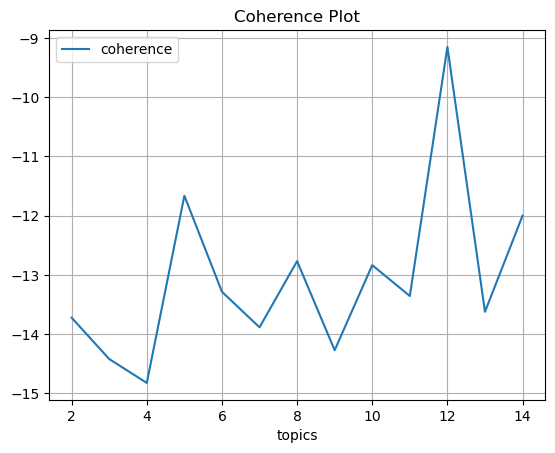

In [29]:
pre_ts_df.plot.line(x='topics', y='coherence', title='Coherence Plot', grid = True)

In [30]:
fig = px.line(pre_ts_df, x='topics', y='coherence', title='Coherence plot')
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



For pre-COVID period, 12 gives the best score but for our analysis we will be seleting 5, since the next best peak is at that point. If required we may go with number of topics less than 5 also.

In [49]:
pre_df_result[pre_df_result['Topics'] == 4].head(5)

,Validation_Set,Topics,Alpha,Beta,Coherence
88,75.0% Corpus,4,asymmetric,0.9099999999999999,-14.304179
478,100% Corpus,4,asymmetric,0.9099999999999999,-14.826730
460,100% Corpus,4,0.61,0.01,-14.852216
453,100% Corpus,4,0.01,0.9099999999999999,-14.912656
86,75.0% Corpus,4,asymmetric,0.31,-14.937558


### Post-COVID

In [21]:
post_df_result = processor.perform_hyperparameter_tuning(post_corpus, 
                                                        post_id2word, 
                                                        post_df['bigram'].values.tolist(), 
                                                        "./../../data/nbfc/aditya_birla_finance/post.csv")

100%|██████████| 780/780 [49:54<00:00,  3.84s/it]


In [22]:
# post_df_result = pd.read_csv("./../../data/nbfc/aditya_birla_finance/post.csv")

In [23]:
# Maximum coherence
post_df_result.sort_values('Coherence', ascending=False, inplace=True)
post_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
378,75.0% Corpus,14,0.9099999999999999,0.9099999999999999,-5.689026
348,75.0% Corpus,13,0.9099999999999999,0.9099999999999999,-5.700812
318,75.0% Corpus,12,0.9099999999999999,0.9099999999999999,-5.869193
288,75.0% Corpus,11,0.9099999999999999,0.9099999999999999,-6.348723
377,75.0% Corpus,14,0.9099999999999999,0.61,-6.656988
8,75.0% Corpus,2,0.31,0.9099999999999999,-7.892391
5,75.0% Corpus,2,0.31,0.01,-7.933994
347,75.0% Corpus,13,0.9099999999999999,0.61,-7.999426
122,75.0% Corpus,6,0.01,0.61,-8.111211
6,75.0% Corpus,2,0.31,0.31,-8.232722


In [32]:
post_ts_df = processor.create_topic_df(post_df_result[post_df_result['Validation_Set'] == '100% Corpus'], 
                                        '0.9099999999999999',
                                        '0.9099999999999999')

<AxesSubplot: title={'center': 'Coherence Plot'}, xlabel='topics'>

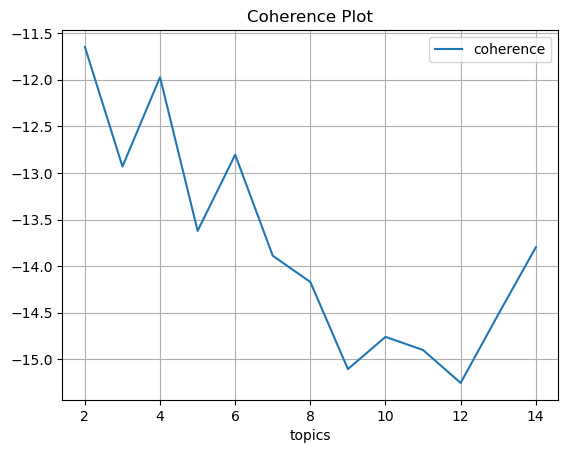

In [33]:
post_ts_df.plot.line(x='topics', y='coherence', title='Coherence Plot', grid = True)

In [34]:
fig = px.line(post_ts_df, x='topics', y='coherence', title='Coherence plot')
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



For the post-COVID period, the model with number of topics equal to 2 gives the best coherence score. But we can also consider number of topics greater than 2.

In [68]:
post_df_result[(post_df_result['Topics'] == 4)].head()

,Validation_Set,Topics,Alpha,Beta,Coherence
62,75.0% Corpus,4,0.01,0.61,-8.550803
85,75.0% Corpus,4,asymmetric,0.01,-8.639434
89,75.0% Corpus,4,asymmetric,symmetric,-8.855310
80,75.0% Corpus,4,symmetric,0.01,-9.483787
86,75.0% Corpus,4,asymmetric,0.31,-9.496243


## Final Models

### Pre-COVID

In [50]:
pre_final_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=4,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha='asymmetric',
                                        eta=0.91)

In [51]:
pre_final_coherence_model_lda = gensim.models.CoherenceModel(model=pre_final_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_final_coherence_lda = pre_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_final_coherence_lda)

Pre-COVID Coherence Score:  -14.355850004386852


### Post-COVID

In [69]:
post_final_lda_model = gensim.models.LdaMulticore(corpus=gensim.utils.ClippedCorpus(post_corpus, int(len(post_corpus)*0.75)),
                                        id2word=post_id2word,
                                        num_topics=4,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha=0.01,
                                        eta=0.61)

In [70]:
post_final_coherence_model_lda = gensim.models.CoherenceModel(model=post_final_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_final_coherence_lda = post_final_coherence_model_lda.get_coherence()
print('Post-COVID Coherence Score: ', post_final_coherence_lda)

Post-COVID Coherence Score:  -9.57193353571256


## Inferencing

### Pre-COVID

In [52]:
pre_df_topic_sents_keywords = processor.dominant_topics(ldamodel=pre_final_lda_model, 
                                                         corpus=pre_corpus, 
                                                         texts=pre_df['bigram'].values.tolist(),
                                                         tweets=pre_df['tweet'].values.tolist())

In [53]:
pre_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,0,0.9698,"housing, loan, capital, apply, money, group_hi...",Meet and interact with Anindya Karmakar Head -...
1,0,0.6929,"housing, loan, capital, apply, money, group_hi...",Does @Lazy_Pay report to #CreditBureaus throug...
2,0,0.9726,"housing, loan, capital, apply, money, group_hi...",Budget based few strong candidates for short t...
3,2,0.9618,"india, bank, results, amc, capital, industries...",Aditya Birla Sun Life Mutual Fund conclave is ...
4,1,0.9505,"bank, capital, housing, loan, customer, india,...",@abchomefinance @RBI @NNagdeo\nFollowing up fr...
...,...,...,...,...
316,0,0.9107,"housing, loan, capital, apply, money, group_hi...",Aditya Birla Sun Life Bal Bhavishya Yojana (Ma...
317,1,0.9601,"bank, capital, housing, loan, customer, india,...","IIFL, Piramal Capital, L&amp;T Finance, Manapp..."
318,0,0.9216,"housing, loan, capital, apply, money, group_hi...",Case Study | How NotifyVisitors’s Heatmap Incr...
319,0,0.9700,"housing, loan, capital, apply, money, group_hi...","RT AshVerma111 ""#RBI Sops For #MSME\n\nLoans B..."


In [55]:
pre_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['housing, loan, capital, apply, money, group_hiring, madhya_ho, commercial_nagda, functional_head, company',
       'india, bank, results, amc, capital, industries, mf, mr, financial_services, energy',
       'bank, capital, housing, loan, customer, india, bn, home_loan, ceo, new_highs',
       'india, lending, capital, money, mi_credit, stocks, lows, week, icofp, batch'],
      dtype=object)

Topics that can be inferred are:

1. Topic Number: 0
   - Probable topic title: News
   - Key terms: 'housing, loan, capital, apply, money, group_hiring, madhya_ho, commercial_nagda, functional_head, company'

<br>

2. Topic Number: 1
   - Probable topic title: Stocks Discussion
   - Key terms: 'working_capital, help_small, indias_raises, businesses_access, loan, business, company, business_loan, heres, documents'

<br>

3. Topic Number: 2
   - Probable topic title: Issues and Queries
   - Key terms: 'india, crore, heres, new, alteria_capital, startups, business, raised, fintech, companies'

<br>

4. Topic Number: 3
   - Probable topic title: Partnerships
   - Key terms: 'india, lending, capital, money, mi_credit, stocks, lows, week, icofp, batch'

In [61]:
pre_dist, fig = processor.plot_topic_distribution(pre_df_topic_sents_keywords)
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



[Text(0, 0, '214'), Text(0, 0, '51'), Text(0, 0, '40'), Text(0, 0, '16')]

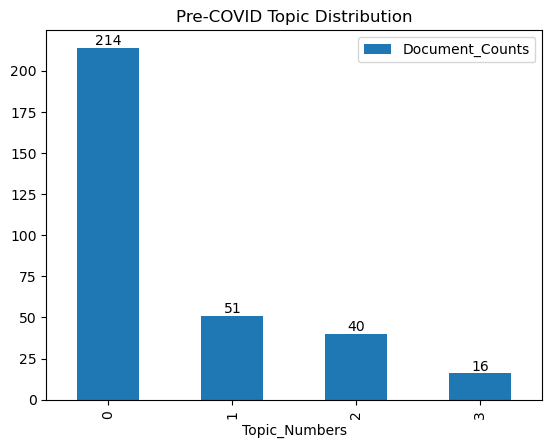

In [62]:
ax = pre_dist.plot.bar(x='Topic_Numbers', y='Document_Counts', title='Pre-COVID Topic Distribution')
ax.bar_label(ax.containers[0])

Topics have unequal distibution.

### Post-COVID

In [71]:
post_df_topic_sents_keywords = processor.dominant_topics(
   ldamodel=post_final_lda_model, corpus=post_corpus, texts=post_df['bigram'].values.tolist(), tweets=post_df['tweet'].values.tolist()
)

In [72]:
post_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,0,0.9979,"bank, loan, india, capital, account, pay, mone...",Aditya birla finance sub debt NCD - tenor 10 y...
1,1,0.9975,"moratorium, emi, bank, loan, raise_funds, rbi,...",ABFL team threatening for payment over chargin...
2,3,0.9984,"loan, raise_funds, company, capital, cp_coupon...",@Atv006kiranraj The sales person from Aditya B...
3,3,0.9988,"loan, raise_funds, company, capital, cp_coupon...","Aditya Birla Fin takes Rs75cr at 6.25%, 5yr bo..."
4,2,0.9957,"loan, moratorium, housing, customer, received,...",@abccare Another ticket raised with Aditya bir...
...,...,...,...,...
781,3,0.8264,"loan, raise_funds, company, capital, cp_coupon...",SHORT TAKES - The Economic Times\n 01-Feb-2020...
782,1,0.7783,"moratorium, emi, bank, loan, raise_funds, rbi,...",@AdityaBirlaGrp @AdityaBirlaGrp @RBI As of now...
783,2,0.9967,"loan, moratorium, housing, customer, received,...",Aditya birla finance company had approach and ...
784,0,0.7046,"bank, loan, india, capital, account, pay, mone...",Aditya birla finance unable to give us answer ...


In [73]:
post_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['bank, loan, india, capital, account, pay, money, id, number, group',
       'moratorium, emi, bank, loan, raise_funds, rbi, threemonth_cp, capital, money, coupon',
       'loan, raise_funds, company, capital, cp_coupon, bank, coupon, group, housing, want',
       'loan, moratorium, housing, customer, received, emi, rbi, account, request, got'],
      dtype=object)

There are no clear distinction between topics, but following topics can be observed in the tweets:

1. Topic Number: 0
   - Probable topic title: *Not a good topic*
   - Key terms: 'bank, loan, india, capital, account, pay, money, id, number, group'

<br>

2. Topic Number: 1
   - Probable topic title: Frauds
   - Key terms: 'moratorium, emi, bank, loan, raise_funds, rbi, threemonth_cp, capital, money, coupon'

<br>

3. Topic Number: 2
   - Probable topic title: Fund Raising
   - Key terms: 'loan, raise_funds, company, capital, cp_coupon, bank, coupon, group, housing, want'

<br>

4. Topic Number: 3
   - Probable topic title: Issues and Queries
   - Key terms: 'loan, moratorium, housing, customer, received, emi, rbi, account, request, got'

In [79]:
post_dist, fig = processor.plot_topic_distribution(post_df_topic_sents_keywords)
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



[Text(0, 0, '315'), Text(0, 0, '173'), Text(0, 0, '159'), Text(0, 0, '139')]

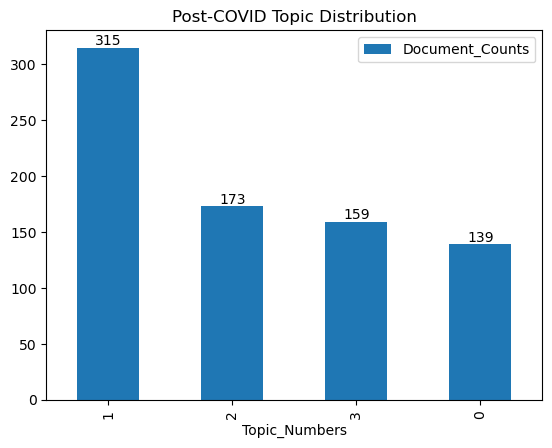

In [80]:
ax = post_dist.plot.bar(x='Topic_Numbers', y='Document_Counts', title='Post-COVID Topic Distribution')
ax.bar_label(ax.containers[0])

More and more people are trying to communicate with the company through Twitter.

In [81]:
# Save outputs
pre_df_topic_sents_keywords.to_csv('./../../data/nbfc/aditya_birla_finance/aditya_birla_finance_pre_output.csv', index=True)
post_df_topic_sents_keywords.to_csv('./../../data/nbfc/aditya_birla_finance/aditya_birla_finance_post_output.csv', index=True)